# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url.format(lat=lats[i], lon=lngs[i], api_key=weather_api_key)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Send a GET request to the OpenWeatherMap API
        response = requests.get(city_url)
        
        # If the request is successful (status code 200), retrieve the data
        if response.status_code == 200:
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            
            # Convert max temperature from Kelvin to Celsius
            city_max_temp_celsius = city_max_temp - 273.15


            # Append the City information into city_data list
            city_data.append({
                "City": city, 
                "Lat": city_lat, 
                "Lng": city_lng, 
                "Max Temp": city_max_temp_celsius,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
        else:
            print("Error occurred for city: %s" % city)
    
    # If an error is experienced, skip the city
    except Exception as e:
        print("City not found. Skipping...")
        print(str(e))
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bremervorde
Processing Record 2 of Set 1 | carnarvon
City not found. Skipping...
'country'
Processing Record 3 of Set 1 | olonkinbyen
City not found. Skipping...
'country'
Processing Record 4 of Set 1 | stephenville
Processing Record 5 of Set 1 | kodiak
City not found. Skipping...
'country'
Processing Record 6 of Set 1 | grytviken
City not found. Skipping...
'country'
Processing Record 7 of Set 1 | papatowai
City not found. Skipping...
'country'
Processing Record 8 of Set 1 | adamstown
City not found. Skipping...
'country'
Processing Record 9 of Set 1 | malazgirt
City not found. Skipping...
'country'
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | ushuaia
City not found. Skipping...
'country'
Processing Record 12 of Set 1 | chandler
City not found. Skipping...
'country'
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | guerrero negro
Cit

City not found. Skipping...
'country'
Processing Record 22 of Set 3 | klyuchi
Processing Record 23 of Set 3 | takoradi
City not found. Skipping...
'country'
Processing Record 24 of Set 3 | boguchany
City not found. Skipping...
'country'
Processing Record 25 of Set 3 | labasa
City not found. Skipping...
'country'
Processing Record 26 of Set 3 | naudero
City not found. Skipping...
'country'
Processing Record 27 of Set 3 | nampula
City not found. Skipping...
'country'
Processing Record 28 of Set 3 | cable beach
City not found. Skipping...
'country'
Processing Record 29 of Set 3 | hadibu
City not found. Skipping...
'country'
Processing Record 30 of Set 3 | mitu
City not found. Skipping...
'country'
Processing Record 31 of Set 3 | mejit
City not found. Skipping...
'country'
Processing Record 32 of Set 3 | kone
City not found. Skipping...
'country'
Processing Record 33 of Set 3 | fort st. john
City not found. Skipping...
'country'
Processing Record 34 of Set 3 | laayoune plage
City not found

Processing Record 44 of Set 5 | ta`u
City not found. Skipping...
'country'
Processing Record 45 of Set 5 | kudahuvadhoo
Processing Record 46 of Set 5 | khandyga
City not found. Skipping...
'country'
Processing Record 47 of Set 5 | wynyard
City not found. Skipping...
'country'
Processing Record 48 of Set 5 | usinsk
City not found. Skipping...
'country'
Processing Record 49 of Set 5 | toga village
City not found. Skipping...
'country'
Processing Record 0 of Set 6 | otaru
City not found. Skipping...
'country'
Processing Record 1 of Set 6 | beacon square
City not found. Skipping...
'country'
Processing Record 2 of Set 6 | akureyri
City not found. Skipping...
'country'
Processing Record 3 of Set 6 | chui
City not found. Skipping...
'country'
Processing Record 4 of Set 6 | kembe
City not found. Skipping...
'country'
Processing Record 5 of Set 6 | mendi
City not found. Skipping...
'country'
Processing Record 6 of Set 6 | the dalles
City not found. Skipping...
'country'
Processing Record 7 of 

City not found. Skipping...
'country'
Processing Record 9 of Set 8 | puerto san jose
City not found. Skipping...
'country'
Processing Record 10 of Set 8 | balaklava
City not found. Skipping...
'country'
Processing Record 11 of Set 8 | sao jose da coroa grande
City not found. Skipping...
'country'
Processing Record 12 of Set 8 | hasaki
City not found. Skipping...
'country'
Processing Record 13 of Set 8 | amalapuram
Processing Record 14 of Set 8 | tolanaro
City not found. Skipping...
'country'
Processing Record 15 of Set 8 | vanino
City not found. Skipping...
'country'
Processing Record 16 of Set 8 | revda
City not found. Skipping...
'country'
Processing Record 17 of Set 8 | ribeira brava
Processing Record 18 of Set 8 | la bresse
City not found. Skipping...
'country'
Processing Record 19 of Set 8 | klaksvik
City not found. Skipping...
'country'
Processing Record 20 of Set 8 | prado
City not found. Skipping...
'country'
Processing Record 21 of Set 8 | dhalie
City not found. Skipping...
'c

City not found. Skipping...
'country'
Processing Record 24 of Set 10 | caleta de carquin
City not found. Skipping...
'country'
Processing Record 25 of Set 10 | lakatoro
City not found. Skipping...
'country'
Processing Record 26 of Set 10 | omuthiya
Processing Record 27 of Set 10 | hithadhoo
City not found. Skipping...
'country'
Processing Record 28 of Set 10 | eastham
City not found. Skipping...
'country'
Processing Record 29 of Set 10 | booue
City not found. Skipping...
'country'
Processing Record 30 of Set 10 | mana
City not found. Skipping...
'country'
Processing Record 31 of Set 10 | bamboo flat
City not found. Skipping...
'country'
Processing Record 32 of Set 10 | ayod
City not found. Skipping...
'country'
Processing Record 33 of Set 10 | rabak
City not found. Skipping...
'country'
Processing Record 34 of Set 10 | kapuskasing
City not found. Skipping...
'country'
Processing Record 35 of Set 10 | bukama
Processing Record 36 of Set 10 | ahau
City not found. Skipping...
'country'
Pro

Processing Record 39 of Set 12 | prudentopolis
City not found. Skipping...
'country'
Processing Record 40 of Set 12 | smirnykh
Processing Record 41 of Set 12 | sayyan
City not found. Skipping...
'country'
Processing Record 42 of Set 12 | tyul'kubas
City not found. Skipping...
'country'
Processing Record 43 of Set 12 | kampung sungai ara
Processing Record 44 of Set 12 | dosso
City not found. Skipping...
'country'
Processing Record 45 of Set 12 | potosi
City not found. Skipping...
'country'
Processing Record 46 of Set 12 | ifrane
City not found. Skipping...
'country'
Processing Record 47 of Set 12 | progreso
City not found. Skipping...
'country'
Processing Record 48 of Set 12 | port hedland
City not found. Skipping...
'country'
Processing Record 49 of Set 12 | mermoz boabab
City not found. Skipping...
'country'
Processing Record 0 of Set 13 | bratsk
City not found. Skipping...
'country'
Processing Record 1 of Set 13 | zouerate
City not found. Skipping...
'country'
Processing Record 2 of 

In [26]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          159
Lat           159
Lng           159
Max Temp      159
Humidity      159
Cloudiness    159
Wind Speed    159
Country       159
Date          159
dtype: int64

In [27]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bremervorde,53.4999,9.0427,5.97,94,0,2.69,DE,1685073004
1,stephenville,48.4297,-60.1609,4.38,96,100,11.65,CA,1685073006
2,hawaiian paradise park,39.2576,42.4191,10.58,74,78,1.17,TR,1685073007
3,albany,47.4822,-64.1804,6.00,92,100,9.52,CA,1685073007
4,yellowknife,26.9280,44.4969,28.56,26,96,2.07,SA,1685073008


In [28]:
# Export the City_Data into a csv
city_data_df.to_csv("Resources/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("Resources/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bremervorde,53.4999,9.0427,5.97,94,0,2.69,DE,1685073004
1,stephenville,48.4297,-60.1609,4.38,96,100,11.65,CA,1685073006
2,hawaiian paradise park,39.2576,42.4191,10.58,74,78,1.17,TR,1685073007
3,albany,47.4822,-64.1804,6.00,92,100,9.52,CA,1685073007
4,yellowknife,26.9280,44.4969,28.56,26,96,2.07,SA,1685073008


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

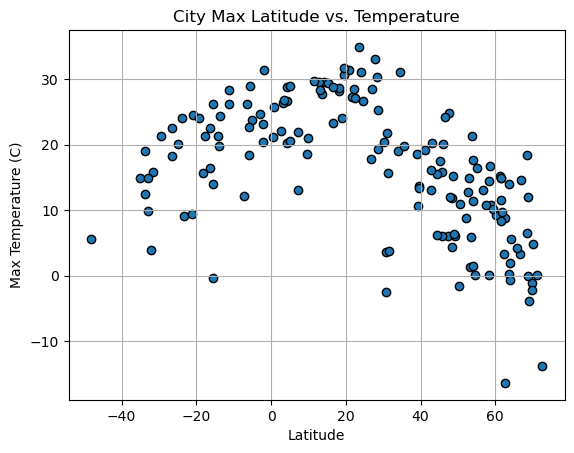

In [30]:
# Build scatter plot for latitude vs. temperature
city_data_df['Max Temp (C)'] = (city_data_df['Max Temp'] - 32) * 5/9
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black')
city_data_df['Max Temp (C)'] = (city_data_df['Max Temp'] - 32) * 5/9
# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

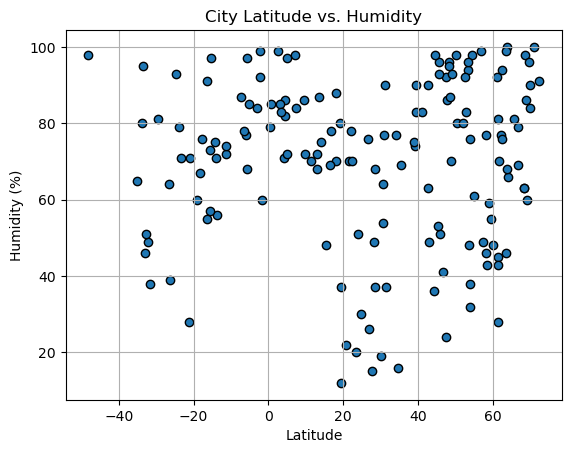

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

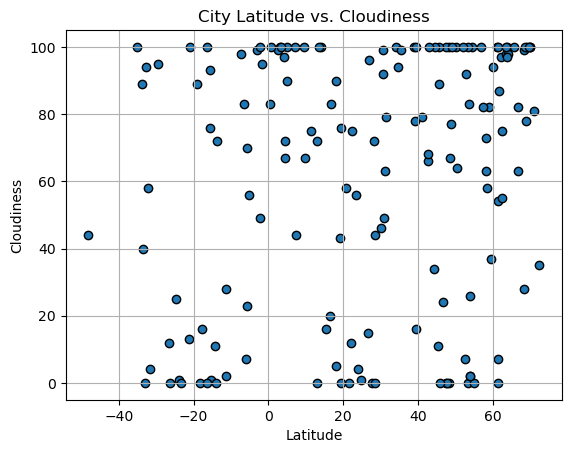

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

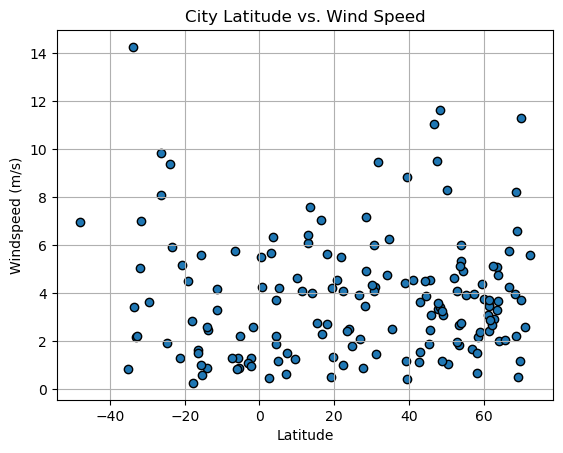

In [33]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Windspeed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [34]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolor='black')
    
    # Plot the regression line
    plt.plot(x_values, regress_values, 'r-', label='Linear Regression')
    
    # Set plot title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add legend
    plt.legend()
    
    # Display correlation coefficient in the plot
    correlation_label = f"Correlation coefficient: {rvalue:.2f}"
    plt.annotate(correlation_label, (min(x_values), max(y_values)), fontsize=12, color='red')
    
    # Show plot
    plt.show()

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,bremervorde,53.4999,9.0427,5.97,94,0,2.69,DE,1685073004,-14.461111
1,stephenville,48.4297,-60.1609,4.38,96,100,11.65,CA,1685073006,-15.344444
2,hawaiian paradise park,39.2576,42.4191,10.58,74,78,1.17,TR,1685073007,-11.900000
3,albany,47.4822,-64.1804,6.00,92,100,9.52,CA,1685073007,-14.444444
4,yellowknife,26.9280,44.4969,28.56,26,96,2.07,SA,1685073008,-1.911111


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
5,waitangi,-5.1762,-38.5832,23.76,85,56,2.20,BR,1685073008,-4.577778
6,saint-paul,-1.8180,104.4197,31.44,60,95,2.57,ID,1685073009,-0.311111
7,opuwo,-20.8279,54.7364,24.60,71,100,5.16,RE,1685073009,-4.111111
15,udachny,-35.1444,114.0647,14.96,65,100,0.86,AU,1685073011,-9.466667
21,tsiombe,-23.8485,-42.4244,24.08,79,1,9.40,BR,1685073014,-4.400000


###  Temperature vs. Latitude Linear Regression Plot

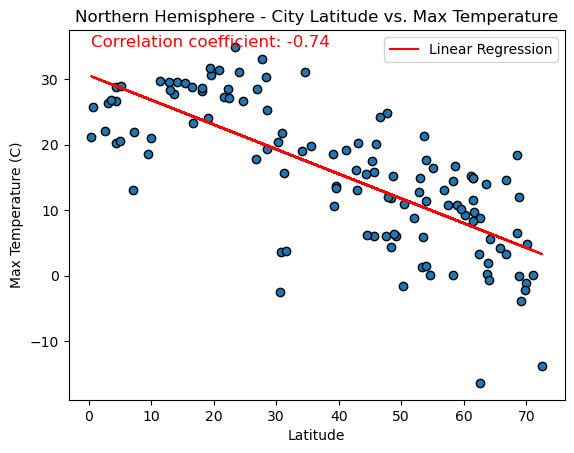

In [37]:
# Linear regression on Northern Hemisphere

create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Northern Hemisphere - City Latitude vs. Max Temperature')

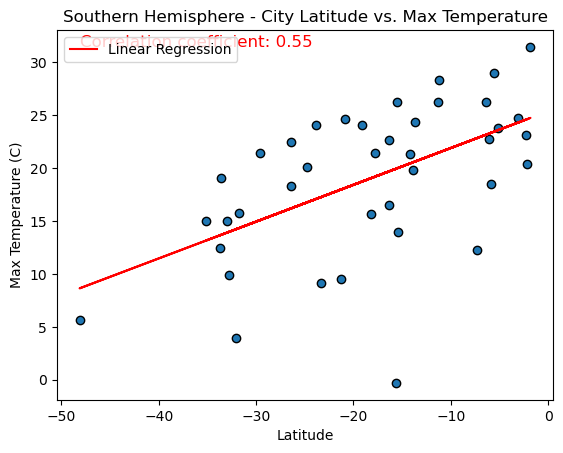

In [38]:
# Linear regression on Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (C)', 'Southern Hemisphere - City Latitude vs. Max Temperature')

**Discussion about the linear relationship:** One can see that the temperature is warmer the closer one get to the equiator.

### Humidity vs. Latitude Linear Regression Plot

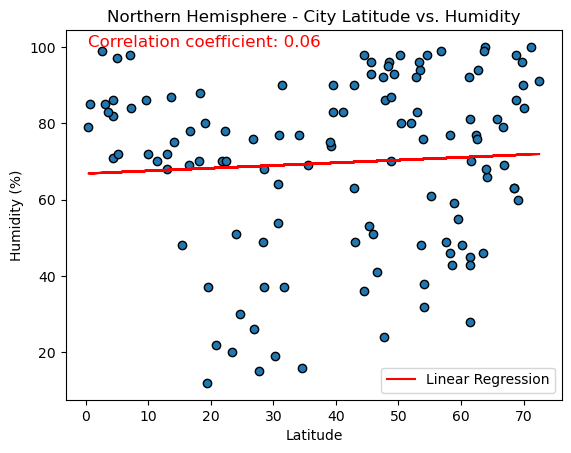

In [39]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Northern Hemisphere - City Latitude vs. Humidity')


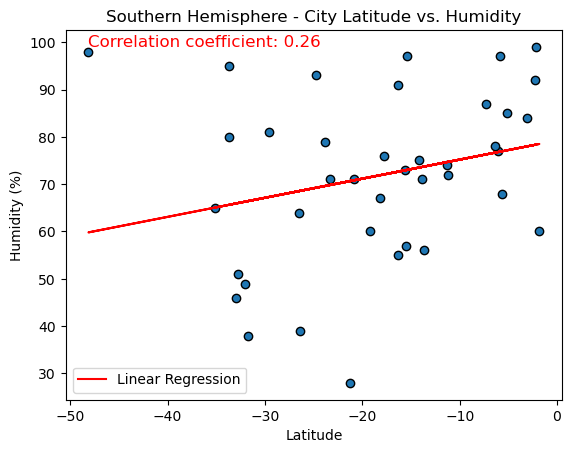

In [40]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Southern Hemisphere - City Latitude vs. Humidity')


**Discussion about the linear relationship:** Humidity appears to be somewhat constant in both the nothern and southern hemisphere, however there are fewer data points in the southern hemisphere so more data would be need to see if this is actually true or not.

### Cloudiness vs. Latitude Linear Regression Plot

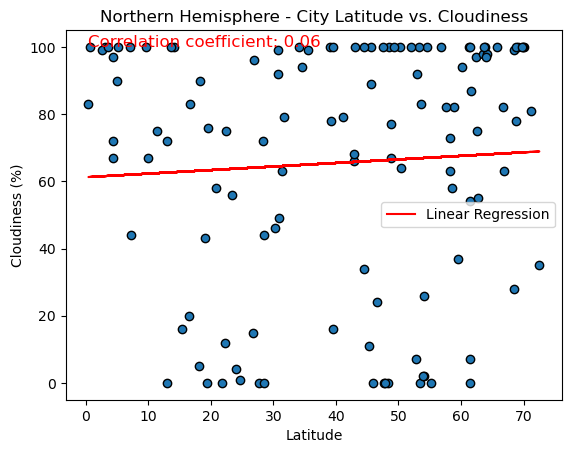

In [41]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Northern Hemisphere - City Latitude vs. Cloudiness')


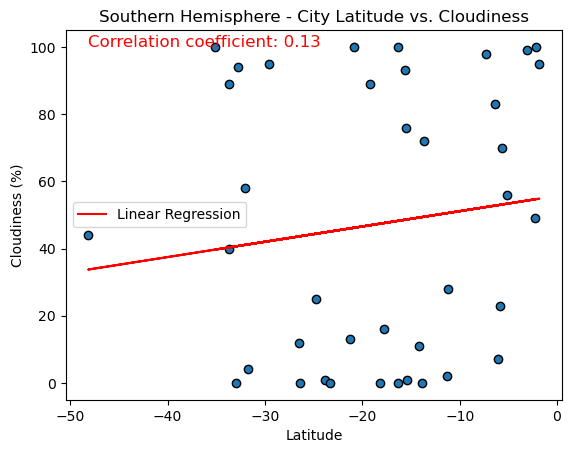

In [42]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Southern Hemisphere - City Latitude vs. Cloudiness')


**Discussion about the linear relationship:** Cloudiness seems constant and is not disimilar between the northern and southern hemisphere. There is a crevat that this data set produced fewer data points in the southern hemisphere, so that would need to be reviewed and taken into account to determine the validity of the conclusion.

### Wind Speed vs. Latitude Linear Regression Plot

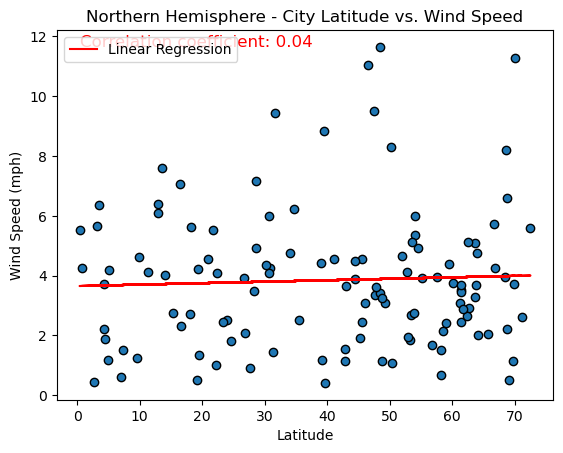

In [43]:
# Northern Hemisphere
create_linear_regression_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Northern Hemisphere - City Latitude vs. Wind Speed')


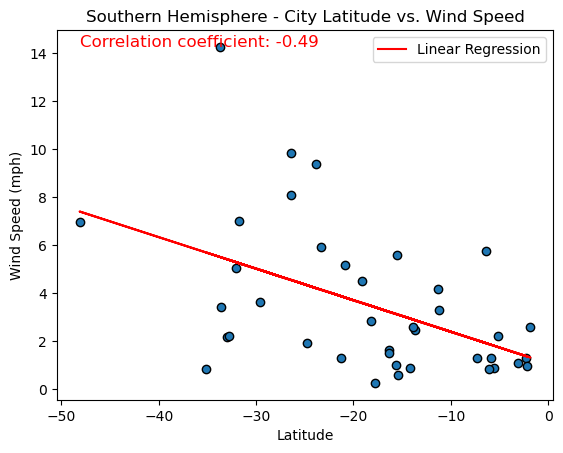

In [44]:
# Southern Hemisphere
create_linear_regression_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (mph)', 'Southern Hemisphere - City Latitude vs. Wind Speed')


**Discussion about the linear relationship:** YOUR RESPONSE HERE